In [300]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [301]:
img = cv2.imread('rov_pool.jpg')


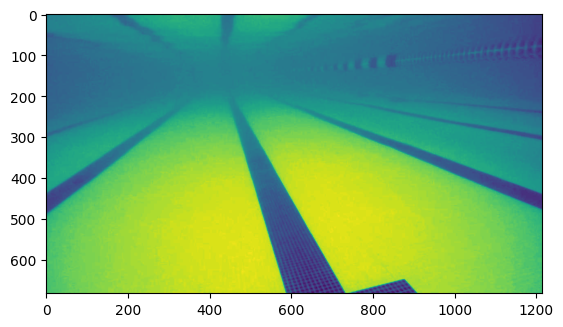

In [302]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

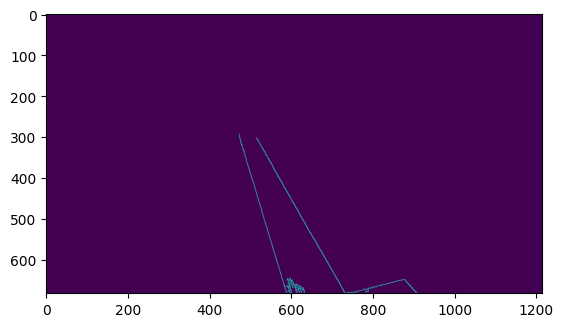

In [303]:
edges = cv2.Canny(gray, 27, 175, apertureSize=3) # detect edges
plt.imshow(edges)

In [304]:
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=30,
        ) # detect lines

In [305]:
lineData = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    #print(line[0])
    slope = (y2 - y1)/(x2 - x1)
    xInt = (slope * x1 - y1) / slope
    lineData.append([slope, xInt, x1, y1, x2, y2])
    #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#print(lineData)

cleanedLines = []
for line in lineData:
    #loop thru cleanedLines, see if line with close enough slope is already within cleanedlines 
    canAdd = True
    for cleanedLine in cleanedLines:
        #if exists, set canAdd to false
        if abs(cleanedLine[1] - line[1]) < 0.5:
            canAdd = False

    if canAdd:
        cleanedLines.append(line)

#print(cleanedLines)

for line in cleanedLines:
    x1 = line[2]
    y1 =line[3]
    x2 = line[4]
    y2 =line[5]
    print(x1, y1, x2, y2)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

#y1 -y = m(x1 - x)
#y1 - y = mx1 - mx
#(y1 - y - mx1) / x  = 0 
#y1 - y - mx1 = 0
# where y = 0
#y1 - mx1
#cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)




475 307 589 681
567 396 731 681


3


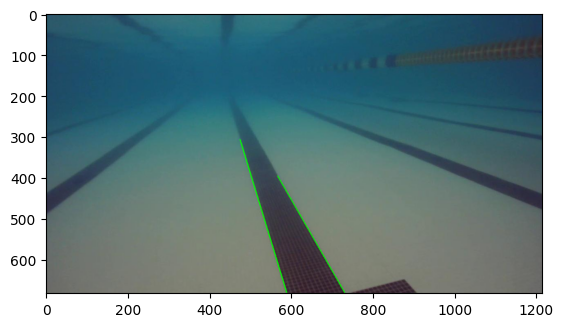

In [306]:
print(len(lines))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))